In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ('ignore')

**Step 1: Importing data**

In [50]:
df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Step 2: Performing EDA On Data**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [52]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [53]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [54]:
df[df.duplicated()].shape

(0, 2)

In [55]:
df[df.duplicated()]

,YearsExperience,Salary


**Step 3: Plotting the data to check for outliers**

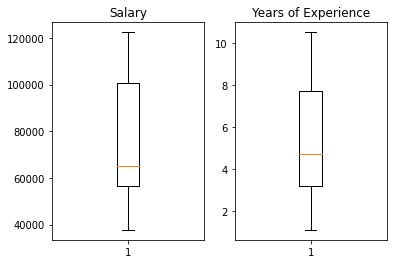

In [56]:
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary')


plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')

plt.show()

As you can see there are no Outliers in the data

**Step 4: Checking the Correlation between variables**

In [57]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Visualization of Correlation beteen x and y**


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

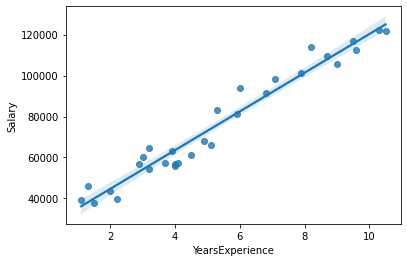

In [58]:
sns.regplot(df['YearsExperience'], df['Salary'])

As you can see above


*   There is good correlation between the two variable.
*   The score is more than 0.85 which is a good sign


**Step 5: Checking for linearity in data**

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

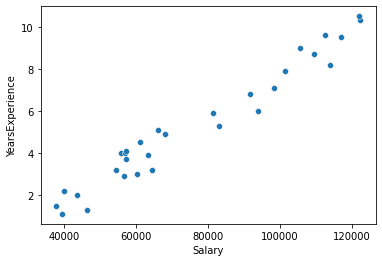

In [59]:
sns.scatterplot (x = 'Salary', y = 'YearsExperience', data = df)

In [60]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

As you can see in above graph

*   It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way

*   The data doesn't have any specific pattern in the variation, and variation is also nearly constant, so we can say its homoscedastic.

**Step 6: Feature Engineering**

Trying different transformation of data to estimate normal distribution and to remove any skewness


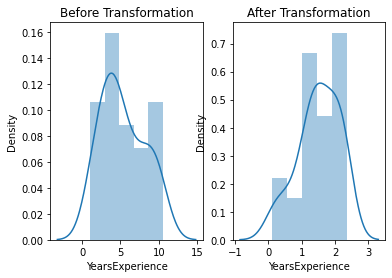

In [61]:
#Checking transformation for first independant feature 'YearsExperience'

plt.subplot(121)
sns.distplot(df['YearsExperience'], bins =5, kde = True)
plt.title('Before Transformation')

plt.subplot(122)
sns.distplot(np.log(df['YearsExperience']), bins =5, kde = True)
plt.title('After Transformation')

plt.show()

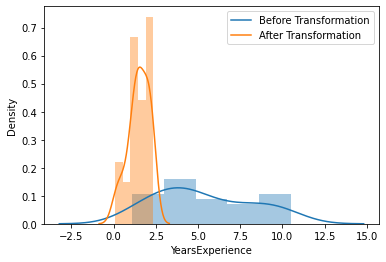

In [62]:
sns.distplot(df['YearsExperience'], bins =5, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 5, kde = True)
plt.legend(['Before Transformation', 'After Transformation'])


As you can see

*   How log transformation affects the data and it scales the values down.


*   Before prediction it is necessary to reverse scale the values, even for calculating RMSE for the models.(Errors)



Text(0.5, 1.0, 'Cube Root Transformation')

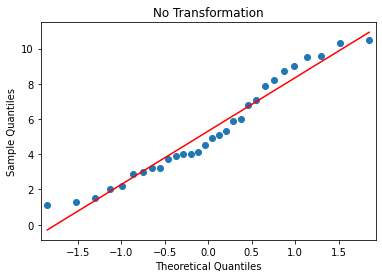

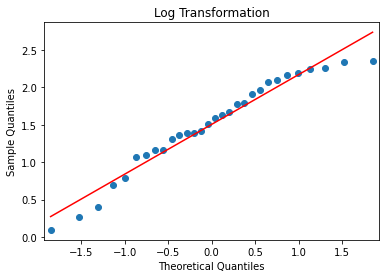

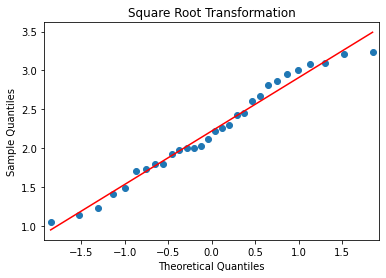

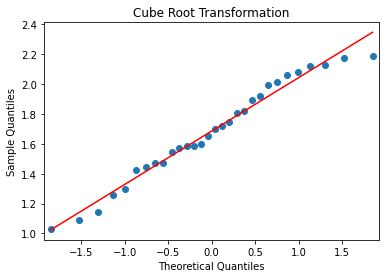

In [63]:
#check different transformations using qq plot

sm.qqplot(df['YearsExperience'], line = 'r')
plt.title('No Transformation')
sm.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log Transformation')
sm.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube Root Transformation')


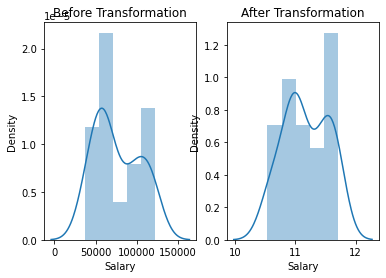

In [64]:
#Checking transformation for dependant feature 'Salary'


plt.subplot(121)
sns.distplot(df['Salary'], bins =5, kde = True)
plt.title('Before Transformation')

plt.subplot(122)
sns.distplot(np.log(df['Salary']), bins =5, kde = True)
plt.title('After Transformation')

plt.show()


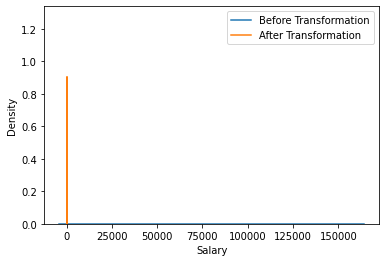

In [65]:
sns.distplot(df['Salary'], bins =5, kde = True)
sns.distplot(np.log(df['Salary']), bins = 5, kde = True)
Labels =['Before Transformation', 'After Transformation']
plt.legend(Labels)


As you can see

*   How log transformation affects the data and it scales the values down.


*   Before prediction it is necessary to reverse scale the values, even for calculating RMSE for the models.(Errors)



Text(0.5, 1.0, 'Cube Root Transformation')

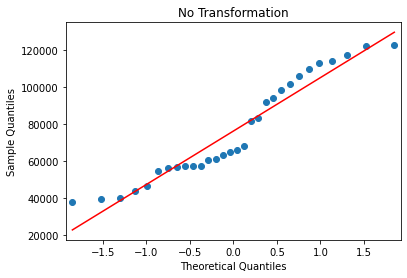

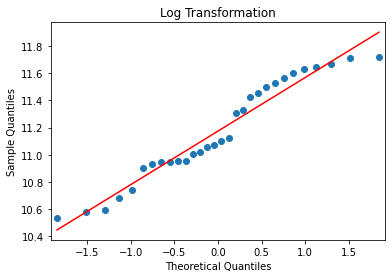

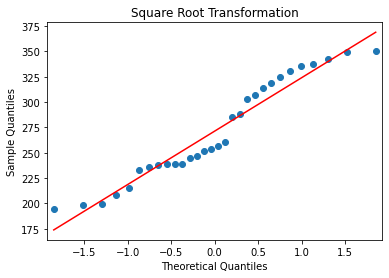

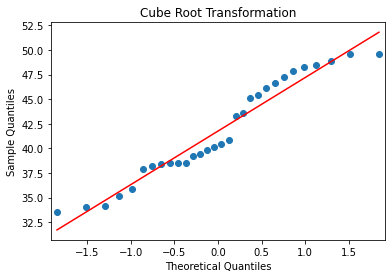

In [66]:
#check different transformations using qq plot

sm.qqplot(df['Salary'], line = 'r')
plt.title('No Transformation')
sm.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log Transformation')
sm.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube Root Transformation')


Important Note:
We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)

In [67]:
df.skew()               #skewness is already less here

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [68]:
a = np.log(df['Salary'])
a.skew()

-0.044126086756988495

**Step 8 : Fitting a Linear Regression Model**

Using Ordinary least squares (OLS) regression

In [69]:
model = smf.ols('Salary ~ YearsExperience', data = df).fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        11:08:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model


*   The R-squared and Adjusted R-squared scores are above 0.85.

*   It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction
*   Lets Try some data transformation to check whether these scores can get any higher than this.


**Square Root transformation on data**

In [71]:
square_root_model = smf.ols('np.sqrt(Salary) ~ np.sqrt(YearsExperience)', data = df).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        11:08:15   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Cube root transformation on data**

In [72]:
cube_root_model = smf.ols('np.cbrt(Salary) ~ np.cbrt(YearsExperience)', data = df).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           6.37e-18
Time:                        11:08:15   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Log transformation on data**

In [73]:
log_model = smf.ols('np.log(Salary) ~ np.log(YearsExperience)', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        11:08:15   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model

The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less in transformations than the actual model 

**Model Testing**\
As Y = C + m*(X)

Finding Coefficient Parameters (m and c values)

In [74]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

Here, (Intercept) **C value** = 25792 & **m value** ((Years of Exp(X)) = 9449\
Hypothesis testing of X variable by finding test_statistics and P_values for m\
i.e if (P_value < α=0.05 ; Reject Null)\
H0 : p- value of m = 0 (No Slope) \
H1 : p- value of m ≠ 0 (Some or significant Slope)

In [75]:
print(model.tvalues,'\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


m value: tvalue=6.38, pvalue=0.00000\
As (pvalue=0)<(α=0.05); Reject Null hyp. \
Thus, X(Years of Exp) variable has good slope and variance w.r.t Y(Salary) variable. (viz. yrs of exp affects salary)


In [76]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

**Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%**

**Step 8 : Residual Analysis**


Test for Normality of Residuals (Q-Q Plot)

line{None, “45”, “s”, “r”, “q”}
Options for the reference line to which the data is compared:

“45” - 45-degree line

“s” - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

“r” - A regression line is fit

“q” - A line is fit through the quartiles.

None - by default no reference line is added to the plot.

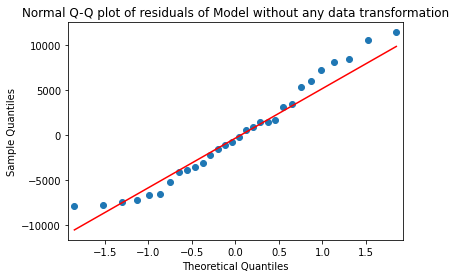

In [78]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

As you can notice in the above plot

*   The model follows normal distribution






**Residual Plot to check Homoscedasticity or Hetroscedasticity**


Homoscedasticity means the error is constant across the values of the dependent variable. 

The easiest way to check homoscedasticity is to make a scatterplot with the residuals is by plotting fitted values against residulas. 

If a model violates homoscedasticity, it will exhibit heteroscedasticity

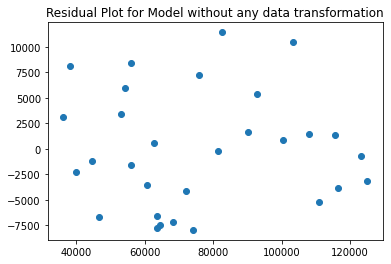

In [82]:
plt.scatter(x = model.fittedvalues, y = model.resid)
plt.title('Residual Plot for Model without any data transformation')
plt.show()

As you can notice in the above plots


*   The Model have Homoscedasciticity.

*   The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.

*   Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed




**Step 10 : Model Validation**

**Comparing different models with respect to their Root Mean Squared Errors**

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
#we need to scale down all the models before calculating
#y_pred (salary_pred) = model.predict ( x (yrs of exp) )


sqr_root_y_pred = np.square (square_root_model.predict(df['YearsExperience']))
cube_root_y_pred = np.power (cube_root_model.predict(df['YearsExperience']),3)     #power is x^a, so for cube root, a is 3
log_model_y_pred = np.exp (log_model.predict(df['YearsExperience']))               #to scale down log, we use exponential

In [85]:
# mse = mean_squared_error(actual, predicted)  

square_root_model_mse = mean_squared_error(df['YearsExperience'],sqr_root_y_pred)
cube_root_model_mse = mean_squared_error(df['YearsExperience'],cube_root_y_pred)
log_model_mse = mean_squared_error(df['YearsExperience'],log_model_y_pred)


In [87]:
print('model_mse=', model.mse_resid,'\n'                        #mse_resid = Mean squared error of the residuals
      'square_root_model_mse=', square_root_model_mse,'\n' 
      'cube_root_model_mse=', cube_root_model_mse,'\n'
      'log_model_mse=', log_model_mse)

model_mse= 33504591.131015327 
square_root_model_mse= 6415659686.487522 
cube_root_model_mse= 6372815664.802795 
log_model_mse= 6232383886.148532


In [88]:
# rmse = sq.rt of mse

model_rmse = np.sqrt (model.mse_resid)
square_root_model_rmse = np.sqrt (square_root_model_mse)
cube_root_model_rmse = np.sqrt (cube_root_model_mse)
log_model_rmse = np.sqrt (log_model_mse)                       

In [89]:
print('model_rmse=', model_rmse,'\n'                                    
      'square_root_model_rmse=', square_root_model_rmse,'\n' 
      'cube_root_model_rmse=', cube_root_model_rmse,'\n'
      'log_model_rmse=', log_model_rmse)

model_rmse= 5788.315051119395 
square_root_model_rmse= 80097.813244105 
cube_root_model_rmse= 79829.91710382015 
log_model_rmse= 78945.44879946235


✅ ***As model without any transformation has the minimum RMSE and highest Adjusted R-squared score. We are going to use normal model to predict our values***

**Step 10 : Predicting values from Model without any Transformation on the Data**

In [90]:
y_pred = (model.predict(df['YearsExperience']))
y_pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [92]:
pd.DataFrame({
              'Years of Experience': df['YearsExperience'],
              'Salary': df['Salary'], 
              'Predicted Salary' : y_pred
              })

,Years of Experience,Salary,Predicted Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
